# Part One: Research Question

## Section A: [Research question here...]

## Section B: Data Dictionary

# Part Two: Data Cleaning Plan

## Section C.1: Techniques & Steps

### Techniques
Identify Duplicated Rows

Identify Missing Values

Identify Outliers

### Duplicated Rows
Use duplicated() and sum(duplicated) functions

### Missing Values
Use isnull.sum() and msno.matrix(df) to visualize

### Identify Outliers
Use boxplot and z-scores

## Section C.2: Assessing Data Quality

## Section C.3: Programming Environment

## Section C.4: Code

In [3]:
# import pandas library
import pandas as pd

In [4]:
# read churn data into DataFrame
df = pd.read_csv('source files/churn_raw_data.csv', header='infer')

In [5]:
# get shape (rows & columns) of the DataFrame
df.shape

(10000, 52)

In [6]:
# get header and first 5 rows of the DataFrame
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [7]:
# view information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### Duplicated Rows

In [8]:
# return duplicated rows
df[df.duplicated() == True]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [9]:
# check for records with duplicates in Customer_id column
df[df.duplicated(subset='Customer_id') == True]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


### Missing Values

In [10]:
# find the sum of missing values for each column
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [11]:
# install missingno using pip
# !pip install missingno

In [12]:
# import missingno to visualize missing values
import missingno as msno

In [13]:
# isolate columns with missing values and add them to a new DataFrame
df_missing = df.loc[:, df.isnull().sum() > 0]
df_missing.isnull().sum()

Children             2495
Age                  2475
Income               2490
Techie               2477
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64

<Axes: >

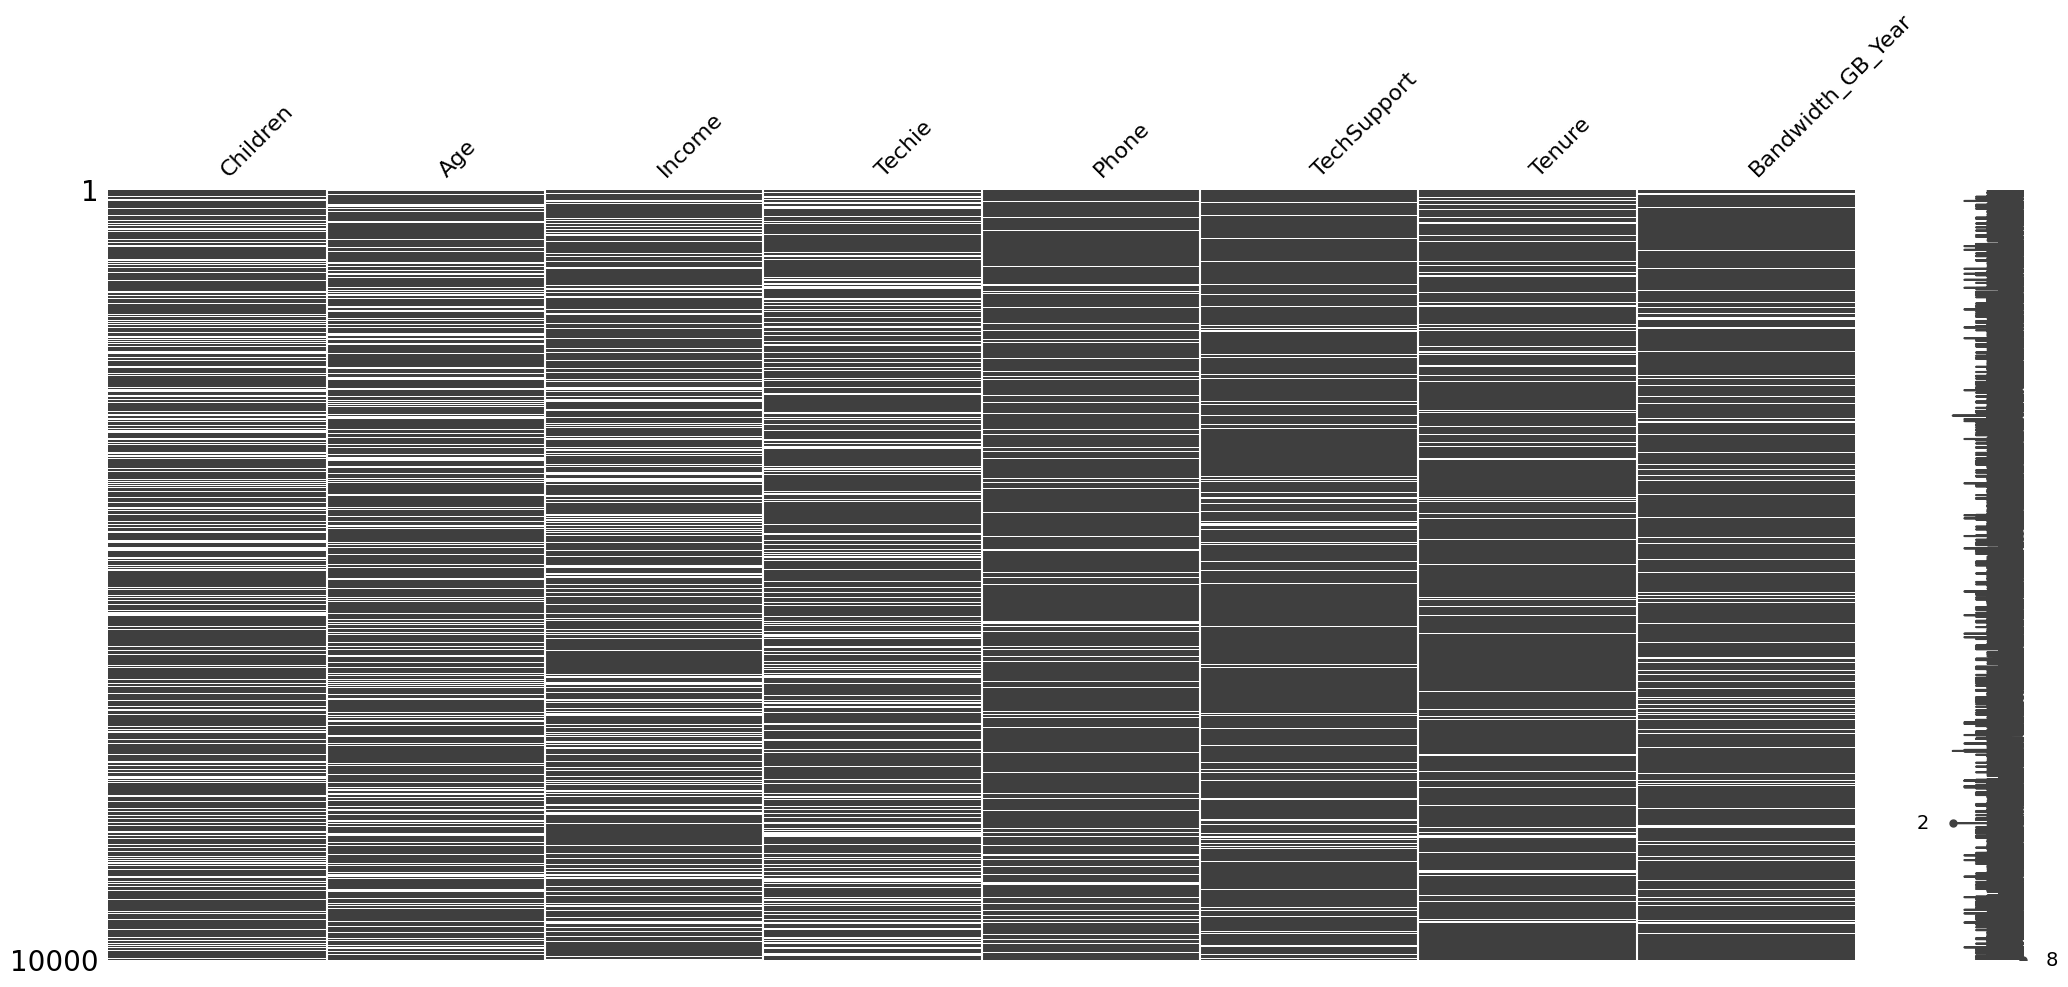

In [14]:
# generate matrix of missing values
msno.matrix(df_missing)

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

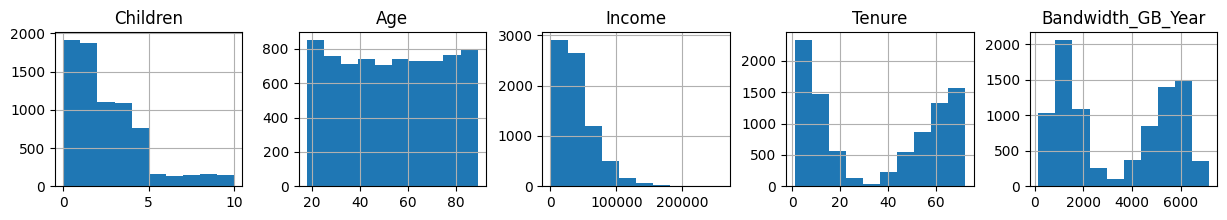

In [15]:
# use histograms to check columns in df_missing for skewness
df_missing.hist(figsize=(15,2), layout=(1,5))

### Outliers

In [16]:
# isolate columns with numerical data relevant for outlier analysis
df_numericals = df[['Children', 
                    'Age', 
                    'Income', 
                    'Outage_sec_perweek', 
                    'Email', 
                    'Contacts', 
                    'Yearly_equip_failure', 
                    'Tenure', 
                    'MonthlyCharge', 
                    'Bandwidth_GB_Year']]

df_numericals.head(5)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,NaN,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110
1,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766
2,4.0,50.0,NaN,10.245616,9,0,1,15.754144,159.440398,2054.706961
3,1.0,48.0,18925.23,15.206193,15,2,0,17.087227,120.249493,2164.579412
4,0.0,83.0,40074.19,8.960316,16,2,1,1.670972,150.761216,271.493436


<Axes: >

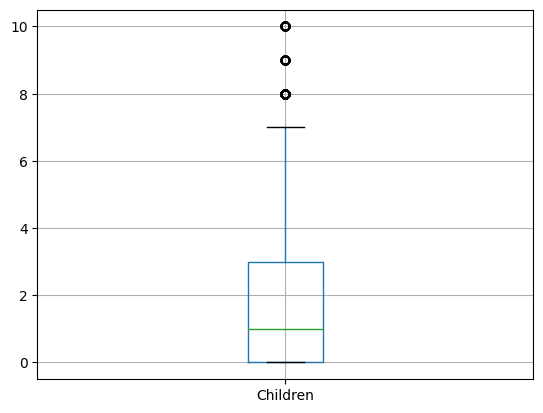

In [17]:
df_numericals.boxplot(column='Children')

<Axes: >

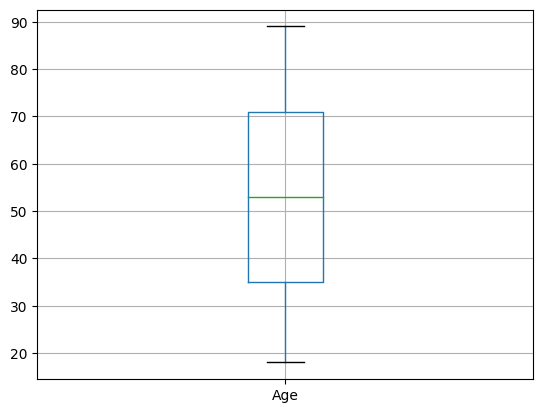

In [18]:
df_numericals.boxplot(column='Age')

<Axes: >

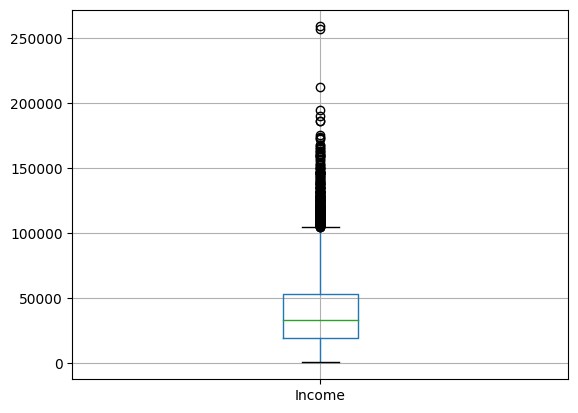

In [19]:
df_numericals.boxplot(column='Income')

<Axes: >

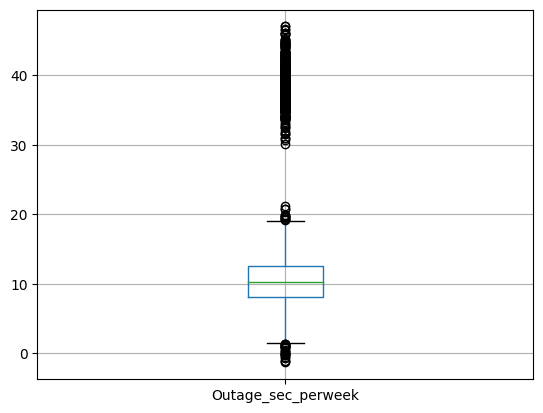

In [20]:
df_numericals.boxplot(column='Outage_sec_perweek')

<Axes: >

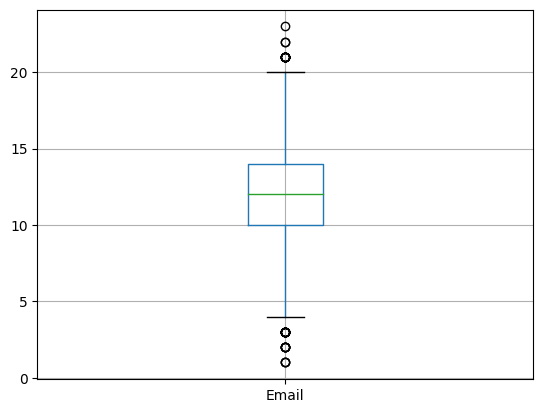

In [21]:
df_numericals.boxplot(column='Email')

<Axes: >

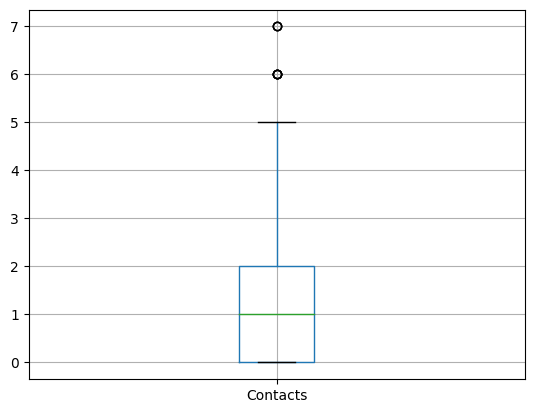

In [22]:
df_numericals.boxplot(column='Contacts')

<Axes: >

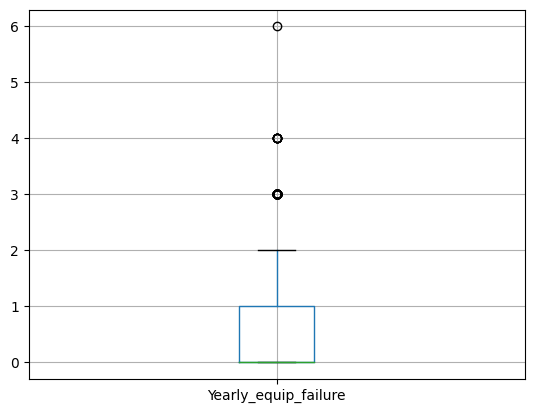

In [23]:
df_numericals.boxplot(column='Yearly_equip_failure')

<Axes: >

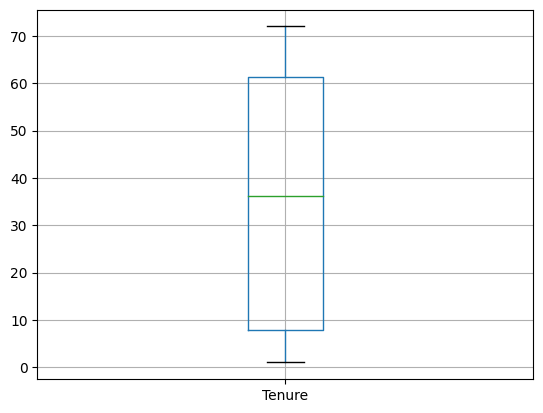

In [24]:
df_numericals.boxplot(column='Tenure')

<Axes: >

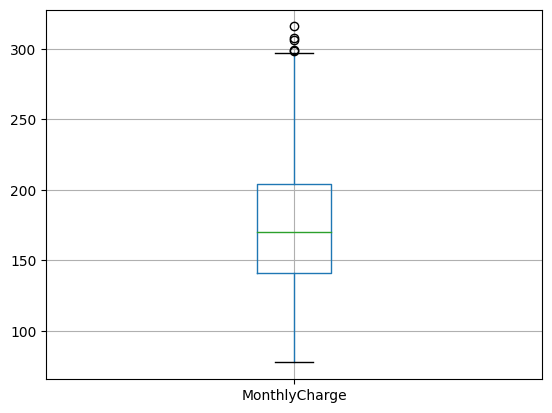

In [25]:
df_numericals.boxplot(column='MonthlyCharge')

<Axes: >

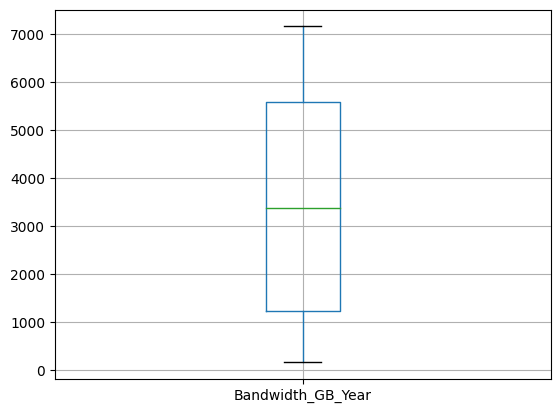

In [26]:
df_numericals.boxplot(column='Bandwidth_GB_Year')

In [27]:
# import scipy.stats to calculate z-scores
from scipy import stats

In [28]:
# create a new DataFrame to hold z-scores for columns that contain outliers
data = {
    'Children':[], 
    'Income':[], 
    'Outage_sec_perweek':[], 
    'Email':[], 
    'Contacts':[], 
    'Yearly_equip_failure':[],  
    'MonthlyCharge':[]
       }

df_zscores = pd.DataFrame(data)

In [29]:
# add z-scores to df_zscores
df_zscores['Children'] = stats.zscore(df_numericals['Children'], nan_policy='omit')
df_zscores['Income'] = stats.zscore(df_numericals['Income'], nan_policy='omit')
df_zscores['Outage_sec_perweek'] = stats.zscore(df_numericals['Outage_sec_perweek'], nan_policy='omit')
df_zscores['Email'] = stats.zscore(df_numericals['Email'], nan_policy='omit')
df_zscores['Contacts'] = stats.zscore(df_numericals['Contacts'], nan_policy='omit')
df_zscores['Yearly_equip_failure'] = stats.zscore(df_numericals['Yearly_equip_failure'], nan_policy='omit')
df_zscores['MonthlyCharge'] = stats.zscore(df_numericals['MonthlyCharge'], nan_policy='omit')

df_zscores.head(5)

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge
0,NaN,-0.401133,-0.637726,-0.666282,-1.005852,0.946658,-0.060613
1,-0.508646,-0.642955,0.079935,-0.005288,-1.005852,0.946658,1.589348
2,0.883715,NaN,-0.171849,-0.996779,-1.005852,0.946658,-0.337752
3,-0.508646,-0.740976,0.534225,0.986203,1.017588,-0.625864,-1.242158
4,-0.972766,0.004846,-0.354795,1.316700,1.017588,0.946658,-0.538041


In [30]:
# return records where absolute value of z-score is greater than or equal to 3, Children column
children_outliers = df_zscores[df_zscores['Children'].abs() > 3]['Children']
children_outliers.count()

144

In [31]:
# return records where absolute value of z-score is greater than or equal to 3, Income column
income_outliers = df_zscores[df_zscores['Income'].abs() > 3]['Income']
income_outliers.count()

110

In [32]:
# return records where absolute value of z-score is greater than or equal to 3, Outage_sec_perweek column
outage_outliers = df_zscores[df_zscores['Outage_sec_perweek'].abs() > 3]['Outage_sec_perweek']
outage_outliers.count()

491

In [33]:
# return records where absolute value of z-score is greater than or equal to 3, Email column
email_outliers = df_zscores[df_zscores['Email'].abs() > 3]['Email']
email_outliers.count()

12

In [34]:
# return records where absolute value of z-score is greater than or equal to 3, Contacts column
contacts_outliers = df_zscores[df_zscores['Contacts'].abs() > 3]['Contacts']
contacts_outliers.count()

165

In [35]:
# return records where absolute value of z-score is greater than or equal to 3, Yearly_equip_failure column
failure_outliers = df_zscores[df_zscores['Yearly_equip_failure'].abs() > 3]['Yearly_equip_failure']
failure_outliers.count()

94

In [36]:
# return records where absolute value of z-score is greater than or equal to 3, MonthlyCharge column
charge_outliers = df_zscores[df_zscores['MonthlyCharge'].abs() > 3]['MonthlyCharge']
charge_outliers.count()

3

# Part Three: Data Cleaning

## Section D.1: Data Quality Findings

### Duplicates

No duplicates were found.

### Missing Values

Missing values were found for the following features:
- Children
- Age
- Income
- Techie
- Phone
- TechSupport
- Tenure
- Bandwidth_GB_Year

### Outliers

The following features contained outliers:
- Children
- Income
- Outage_sec_perweek 
- Email 
- Contacts 
- Yearly_equip_failure
- MonthlyCharge

## Section D.2: Methods 

### Duplicates

Since no duplicates were found, it is not necessary to implement methods to handle duplicate values.

### Missing Values

Depending on the data type and characteristics of the data, different methods will be used to handle missing values.

### Qualitative Data

Features with the qualitative data type are:
- Techie
- Phone
- TechSupport

Missing values for these features will be imputed using the mode.
### Quantitative Data: Uniform Distribution

Age is the only uniform feature with the quantitative data type. Missing values for this feature will be imputed using random values within the range of Age.
### Quantitative Data: Skewed & Bi-Modal Distribution
Features with the quantitative data type are:
- Children
- Income
- Tenure
- Bandwidth_GB_Year

Missing values for these features will be imputed using the median.

### Outliers
If there is indication that a set of outliers are the result of error or illegitimate entry, records containing these outliers will be removed from the dataset. Otherwise, such outliers will be retained.

### Indication of Illegitimacy
For this project, illegitimacy will be determined based on the volume of outliers found in a given feature. It is assumed that if a feature contains a sparse number of outliers, then those outliers are illegitimate. In Section C.4: Outliers, queries were performed to identify the number of outliers in each feature.

### Illegitimate Outliers
The features MonthlyCharge and Email contained relatively few outliers (3 and 12, respectively). Records containing these outliers will be removed from the dataset.

### Legitimate Outliers
Each of the following features contained more than 100 outliers:
- Children
- Income
- Outage_sec_perweek
- Email
- Contacts
- Yearly_equip_failure
- MonthlyCharge

These features will be retained in the dataset.

## Section D.3: Code 

### Handling Missing Values

In [37]:
# fill missing values for the Techie, Phone, and TechSupport using the mode
df['Techie'].fillna(df['Techie'].mode()[0], inplace=True)
df['Phone'].fillna(df['Phone'].mode()[0], inplace=True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)

In [38]:
# verify Techie, Phone, and TechSupport do not contain missing values
df[['Techie', 'Phone', 'TechSupport']].isnull().sum()

Techie         0
Phone          0
TechSupport    0
dtype: int64

In [39]:
# get rage of Age feature
df['Age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [40]:
# import numpy to generate random integers
import numpy as np

In [41]:
# fill missing values for Age using random values within the range
age_min = 18
age_max = 90
size = df['Age'].isnull().sum()

# create random array using numpy
rand_array = np.random.randint(age_min, age_max, size)

# create DataFrame to fillna with
values = df[df['Age'].isnull()][['Age']]
values.insert(0, 'rand_int', rand_array)

df['Age'].fillna(value=values['rand_int'], inplace=True)

In [42]:
# verify Age does not contain missing values
df['Age'].isnull().sum()

0

<Axes: >

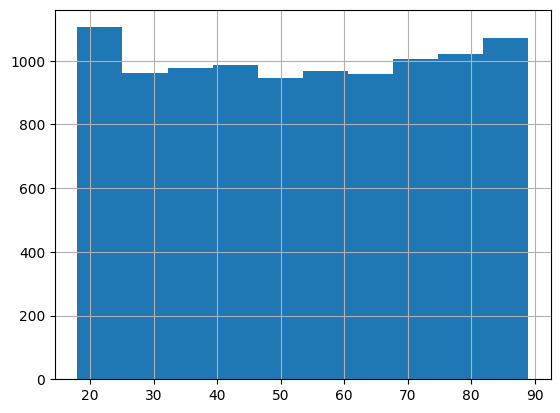

In [43]:
df['Age'].hist()

In [44]:
# fill missing values for Children, Income, Tenure, Bandwidth_GB_Year using the median
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace=True)

In [45]:
# verify Children, Income, Tenure, and Bandwidth_GB_Year do not contain missing values
df[['Children', 'Income', 'Tenure', 'Bandwidth_GB_Year']].isnull().sum()

Children             0
Income               0
Tenure               0
Bandwidth_GB_Year    0
dtype: int64

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

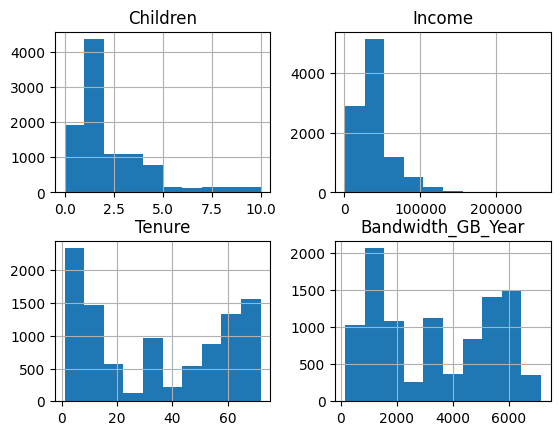

In [46]:
df[['Children', 'Income', 'Tenure', 'Bandwidth_GB_Year']].hist()

### Handling Outliers

In [47]:
# remove outliers from the MonthlyCharge and Email columns
df.drop(index=charge_outliers.index, inplace=True)
df.drop(index=email_outliers.index, inplace=True)

<Axes: >

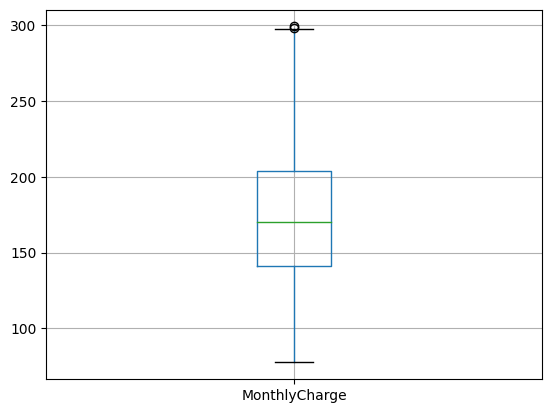

In [48]:
# verify outliers have been removed from MonthlyCharge
df[['MonthlyCharge']].boxplot()

<Axes: >

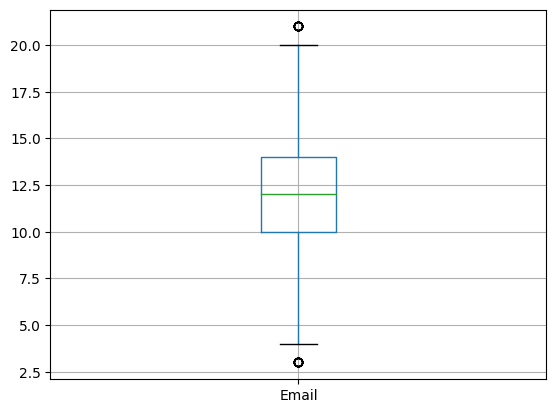

In [49]:
# verify outliers have been removed from Email
df[['Email']].boxplot()

### Re-Expression of Categorical Variables

In [80]:
# view categorical variables

df[[
    'Interaction',
    'City',
    'State',
    'County',
    'Area',
    'Timezone',
    'Job',
    'Education',
    'Employment',
    'Marital',
    'Gender',
    'Churn',
    'Techie',
    'Contract',
    'Port_modem',
    'Tablet',
    'InternetService',
    'Phone',
    'Multiple',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'PaymentMethod'
]].head(5)

,Interaction,City,State,County,Area,Timezone,Job,Education,Employment,Marital,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,Urban,America/Sitka,Environmental health practitioner,Master's Degree,Part Time,Widowed,...,1,0,1,1,0,0,0,1,1,Credit Card (automatic)
1,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,Urban,America/Detroit,"Programmer, multimedia",Regular High School Diploma,Retired,Married,...,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic)
2,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,Urban,America/Los_Angeles,Chief Financial Officer,Regular High School Diploma,Student,Widowed,...,1,1,0,0,0,0,0,1,1,Credit Card (automatic)
3,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,Suburban,America/Los_Angeles,Solicitor,Doctorate Degree,Retired,Married,...,1,0,1,0,0,0,1,0,1,Mailed Check
4,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,Suburban,America/Chicago,Medical illustrator,Master's Degree,Student,Separated,...,0,0,0,0,0,1,1,0,0,Mailed Check


In [82]:
# count unique values in each categorical variable
# will be used to determine which variables can be re-expressed as numerical data
# variables with 3 or fewer unique values will be re-expressed as numerical data

df[[
    'Interaction',
    'City',
    'State',
    'County',
    'Area',
    'Timezone',
    'Job',
    'Education',
    'Employment',
    'Marital',
    'Gender',
    'Churn',
    'Techie',
    'Contract',
    'Port_modem',
    'Tablet',
    'InternetService',
    'Phone',
    'Multiple',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'PaymentMethod'
]].nunique()

Interaction         9985
City                6054
State                 52
County              1620
Area                   3
Timezone              25
Job                  639
Education             12
Employment             5
Marital                5
Gender                 3
Churn                  2
Techie                 2
Contract               3
Port_modem             2
Tablet                 2
InternetService        3
Phone                  2
Multiple               2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [67]:
# apply ordinal encoding: yes/no values

df.replace(to_replace='No', value=0, inplace=True)
df.replace(to_replace='Yes', value=1, inplace=True)

df[[
    'Area',
    'Gender',
    'Churn',
    'Techie',
    'Contract',
    'Port_modem',
    'Tablet',
    'InternetService',
    'Phone',
    'Multiple',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling'
]].head(5)

,Area,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,Urban,Male,0,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1
1,Urban,Female,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1
2,Urban,Female,0,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1
3,Suburban,Male,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1
4,Suburban,Male,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0


In [70]:
# apply ordinal encoding: Contract variable

contract_values = {'Month-to-month':0,
                   'One year':1,
                   'Two Year':2
                  }

df.replace(contract_values, inplace=True)
df[['Contract']].head(5)

,Contract
0,1
1,0
2,2
3,2
4,0


In [85]:
# label encoding: Area and Gender variables
# return unique values from Area and Gender

df['Area'].unique(), df['Gender'].unique()

(array(['Urban', 'Suburban', 'Rural'], dtype=object),
 array(['Male', 'Female', 'Prefer not to answer'], dtype=object))

In [86]:
# apply label encoding for Area and Gender

area_values = {
    'Rural':0,
    'Suburban':1,
    'Urban':2
}

gender_values = {
    'Female':0,
    'Male':1,
    'Prefer not to answer':2
}

df.replace(area_values, inplace=True)
df.replace(gender_values, inplace=True)

df[['Area', 'Gender']].head(5)

,Area,Gender
0,2,1
1,2,0
2,2,0
3,1,1
4,1,1


In [71]:
# return unique values from InternetService variable
# will be used to perform one-hot encoding

df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [76]:
# create new columns (FiberOptic & DSL) to perform one-hot encoding

df['DSL'] = df['InternetService'].str.contains('DSL')
df['FiberOptic'] = df['InternetService'].str.contains('Fiber Optic')
df.drop(columns='InternetService')
df[['DSL', 'FiberOptic']].head()

,DSL,FiberOptic
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True


In [77]:
# apply ordinal encoding: True/False values
df.replace(to_replace=False, value=0, inplace=True)
df.replace(to_replace=True, value=1, inplace=True)
df[['DSL', 'FiberOptic']].head()

,DSL,FiberOptic
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [87]:
# data cleaning and data wrangling complete
# save results to csv

#df.to_csv('output files/churn_cleaned_data.csv', header=True)

### Principal Component Analysis

In [48]:
# install sklearn
# pip install scikit-learn

In [49]:
# import libraries from sklearn to perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
# create DataFrame with numerical values for PCA
variables = df[['Zip', 
             'Lat', 
             'Lng', 
             'Population', 
             'Children', 
             'Age', 
             'Income', 
             'Outage_sec_perweek', 
             'Email', 
             'Contacts', 
             'Yearly_equip_failure', 
             'Tenure', 
             'MonthlyCharge', 
             'Bandwidth_GB_Year', 
             'item1', 
             'item2', 
             'item3', 
             'item4', 
             'item5', 
             'item6', 
             'item7', 
             'item8']]

variables.head(5)

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,99927,56.25100,-133.37571,38,1.0,68.0,28561.990,6.972566,10,0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,48661,44.32893,-84.24080,10446,1.0,27.0,21704.770,12.014541,12,0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,97148,45.35589,-123.24657,3735,4.0,50.0,33186.785,10.245616,9,0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,92014,32.96687,-117.24798,13863,1.0,48.0,18925.230,15.206193,15,2,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,77461,29.38012,-95.80673,11352,0.0,83.0,40074.190,8.960316,16,2,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [85]:
# standardize df_pca using StandardScaler
scaler = StandardScaler()
scaled_variables = scaler.fit_transform(variables)

In [86]:
# apply PCA
pca = PCA(n_components=variables.shape[1])
pca.fit(scaled_variables)
df_pca = pd.DataFrame(pca.transform(scaled_variables))

#### Component Loadings Matrix

In [91]:
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                       'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22'],
                        index=variables.columns)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Zip,-0.019095,0.600192,0.363128,0.046354,0.024846,0.010902,0.011785,-0.009886,0.003640,0.011171,...,-0.017520,-0.088439,-0.079827,-0.013318,-0.012102,-0.003129,-0.003764,-0.011729,0.041618,-0.697914
Lat,-0.001228,0.035341,-0.003549,-0.004813,-0.703410,-0.062264,-0.074408,-0.058130,-0.007343,0.036240,...,0.038377,0.493675,0.476993,0.038612,0.028615,-0.005970,0.014336,0.007984,0.007893,-0.117309
Lng,0.017041,-0.603352,-0.362852,-0.043906,0.061622,-0.000669,-0.001123,0.022906,-0.004795,-0.012827,...,0.004717,-0.018629,-0.019870,0.002480,0.006311,0.011827,-0.006784,0.008512,0.043576,-0.703118
Population,-0.002897,0.052755,0.038618,0.023827,0.675779,0.073954,0.031773,0.097242,0.066160,-0.052861,...,0.056646,0.565977,0.426016,0.050228,0.001078,-0.000291,0.000128,0.006530,0.001087,-0.030994
Children,0.001182,-0.028030,-0.019111,0.006893,-0.049036,0.002099,0.625065,-0.130987,0.125180,0.352832,...,0.008864,-0.011057,0.033756,-0.036135,-0.017888,0.011386,0.018414,0.007743,-0.018284,0.000615
Age,0.004104,0.010787,-0.016491,-0.014393,-0.020511,-0.000431,-0.450608,0.468603,-0.101755,0.511411,...,0.019429,-0.015408,-0.047725,0.000850,-0.003207,-0.011567,0.007079,-0.017290,0.020884,0.005056
Income,-0.000773,-0.002837,0.006777,0.024048,-0.061194,-0.008348,0.185358,0.342819,0.808775,0.202093,...,-0.071589,-0.025371,-0.003898,-0.060362,-0.006020,0.000410,0.013782,-0.004786,0.001224,0.001561
Outage_sec_perweek,-0.012813,-0.007869,0.019042,-0.048634,-0.085593,0.698096,0.036290,0.022503,0.018806,0.014552,...,0.694240,0.029516,-0.116921,0.006325,-0.013265,-0.016985,0.010724,0.004491,0.000546,-0.000423
Email,0.008323,-0.000224,-0.021347,-0.004625,0.148643,0.061973,-0.185496,-0.557410,-0.025526,0.699915,...,-0.042061,-0.012348,0.077192,-0.021543,-0.017334,0.007938,-0.010504,-0.001915,0.005333,-0.002264
Contacts,-0.009199,-0.008781,-0.002134,-0.011472,0.023579,0.010706,-0.465862,0.134972,0.259730,-0.038489,...,0.027570,-0.029641,0.026043,-0.033171,-0.003599,-0.026369,0.020982,0.000141,-0.002531,0.002186


In [92]:
# calculate covariance, define eigenvalues
cov_matrix = np.dot(scaled_data.T, scaled_data)/variables.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

In [93]:
# import matplotlib for plots
import matplotlib.pyplot as plt

### Scree Plot

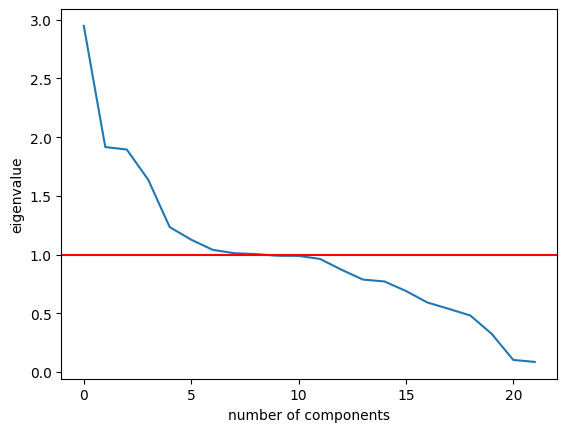

In [97]:
# plot eigenvalues against number of components 
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='r')
plt.show()

## Section D.4: Verification and Outcome

## Section D.5: Output File 

## Section D.6: Limitations 

## Section D.7: Effect on the Research Question

## Section E.1: Principal Component Analysis

A Principal Component Analysis (PCA) was performed in Section D.3: Code. The results of the PCA indicate that there are 6 principal components in the dataset.

## Section E.2: Kaiser Rule

The Kaiser Rule recommends retaining principal components with eigenvalues greater than 1. According to the scree plot (refer to Section D.3:Code) principal compononents 1 through 6 should be retained as they fall above this threshold.

## Section E.3: Benefits of PCA

# Part Four: Supporting Documents

## Section F: Panopto Video

## Section G: Web Sources

- missingno (webinar/book)
- PCA (webinar/book)
- DataFrame.loc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- pandas.Series.str.contains https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.contains.html
- z-scores https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
- random numbers https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

## Section H: References

- handling missing values & outliers (webinar/book)
- PCA (webinar/book)